## Question 1: Implementation of basic neural netwrok without any hidden layer.

(a) Generate some random 1D test data according to a simple linear function, with Gaussian noise added. For example, your data might be generated with: y = 7x + 3 + ξ, where ξ is a Gaussian random variable. Include a plot showing the training data and the function that your network computes. (You can plot the function by evaluating it on a range of different inputs). This is all 1D, so easy to visualize.

**Sol:** Here we implement designing a neural network which will take arbitary number of inputs for arbitary dimensions. This network has no hidden layers. 
#### Loss Function
Regression loss function as given in the question.

#### Input 
Inputs are generated randomly by setting the number of training inputs and the dimensions.

#### Outputs 
The oputputs are limited to a single output. If the there is an n dimensional input, output is a function of these n inputs to produce a single value. (Here I have considered summation as the function for n dimensions).
I have used the function y = 7x + 3 + ξ to produce the outputs.

#### Hyper Paramters
For this function there are only two Hyper paramters, that is the **Learning Rate** (Step Size) and the number of **epochs** 



#### The Netwrok has 5 main Functions
1) Network Initialization
2) feed_forward
3) back_prop
4) update_network 
5) train

**Now lets got thorugh each function**


In [60]:
## Initialize the Network
def initialize_network(n_inputs, dimensions):
    x= np.random.rand(n_inputs,dimensions) ## Randomly Genrated Inputs
    y= 7*x + 3 + np.random.randn(1)        ## Output function of x
    y = np.sum(y,axis=1,keepdims= True)    ## To produce a single output
    wts= np.random.randn(dimensions,1)     ## Weight Initialization
    b =  np.random.randn(1)                ## Bias Initialization
    return x,y,wts,b

## Feed Forward Function
def feed_forward(x,wts,b):
    a1= np.dot(x,wts)+b                     ## calculating the Output
    return a1

## Back Propogation
def back_prop(x,y,a1):
    error = (((y-a1)**2).sum())             ## Calculating the error
    wt_err = -x.T.dot(y-a1)                 ## 
    b_err = (a1-y).sum()
    return wt_err, b_err, error

def update_network(wts, b, wt_err, b_err,lr):
    wts -= lr*wt_err
    b -= lr*b_err
    return wts,b

def train(net,epochs,lr):
    error = []
    for i in range(epochs):
        a1 = feed_forward(net[0],net[2],net[3])
        err= back_prop(net[0], net[1],a1)
        error.append(err[2])
        update = update_network(net[2], net[3], err[0], err[1],lr)
#         print("error in epoch"+ str(i)+"is"+str(err[2]))
#         print("wts="+ str(update[0]))
    return error

[[126.71525394]
 [123.14765748]
 [124.40695279]
 [108.95004003]
 [137.87250013]
 [126.13591916]
 [134.11488491]
 [127.11540082]
 [127.87769025]
 [137.12305414]]


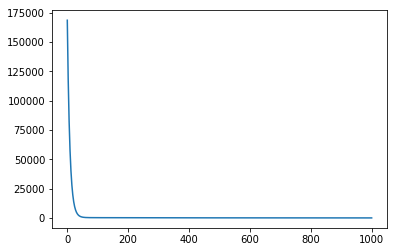

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp

net=initialize_network(10,20)
epochs= 1000
lr = 0.001
np.random.seed(1)
# net[0]
print(net[1])
error = train (net,epochs,lr)

# Plotting the Error
x= np.linspace(0,1000,1000)
plt.plot(x,error)



In [ ]:
# Debug
a1 = feed_forward(net[0],net[2],net[3])
err= back_prop(net[0], net[1],a1)
# print(a1)
# net[1]
update = update_network(net[2], net[3], err[0], err[1],lr)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp

# def nonlin(x, deriv = False):
#     if (deriv == True):
#         return 1 if (x>0) else 0
#     return np.maximum(0,x)

def nonlin(x, deriv = False):
    if (deriv == True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def train (dataset):
    # Weights for the first and only layer 
    lr= 0.001
    wts = np.random.random((1,1))
    b=np.random.random((1))
    err = []
    for j in range(1000):
        er=0
        for i in range(len(dataset)):
            row = np.reshape(dataset[i,:],(1,2))
            inp = np.reshape(row[0,0:row.size-1],(1,1))
#             print("inp shape"+ str(inp.shape))
            target = row[0,row.size-1]
#             print("target shape"+ str(target.shape))
            a1= np.dot(inp,wts)+b
#             print("a1 shape"+ str(a1.shape))
            a1_error = target - a1 
            err.append(a1_error)
            er=er+ a1_error
#             print("a1_error shape"+ str(a1_error.shape))
            wts = wts - lr*a1_error*inp
#             b = b - lr*a1_error
#             print(a1_error)
#             print(wts)
#             print("end of row"+ str(i))
        print("end of iteration"+ str(j))
        print("er"+ str(er))
        
    print ("Output after Training")
    print (a1_error)
    return err

In [ ]:
wts = np.random.random((2,1))
b=np.random.random((1))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp
seed(1)
err= train(dataset)
x= np.linspace(0,100,100)
# plt.plot(x,err,'ro')
print(err)


In [ ]:
wts = np.random.random((2,1))
b=np.random.random((1))
lr= 0.0001
for i in range(len(dataset)):
    row = np.reshape(dataset[i,:],(1,3))
    inp = np.reshape(row[0,0:row.size-1],(1,2))
#   print("inp shape"+ str(inp.shape))
    target = row[0,row.size-1]
#   print("target shape"+ str(target.shape))
    a1= np.dot(inp,wts)+b
#   print("a1 shape"+ str(a1.shape))
    a1_error = target - a1
#   print("a1_error shape"+ str(a1_error.shape))
    wts = wts + lr*a1_error
    b = b + lr*a1_error
#     print(a1_error.sum())
    print(wts)
#     print(target)
    print("end of row"+ str(i))
print("end of iteration"+ str(i))

In [ ]:
inp = np.reshape(row[0,0:row.size-1],(1,inp.size))
print("inp shape"+ str(inp.shape))
target = row[0,row.size-1]
print("target shape"+ str(target.shape))
wts = np.random.random((inp.size,1))
b=np.random.random((1))
a1= np.dot(inp,wts)+b
print("a1 shape"+ str(a1.shape))
a1_error = target - a1 * inp
print("a1_error shape"+ str(a1_error.shape))
wts = wts + a1_error
b = b + a1_error.sum()


# syn.shape

# assert(inputs.shape==targets.shape)
# inputs.shape
# inputs.size

# len(inputs)
# syn.shape
# print(syn)

In [ ]:
np.random.randn()

In [ ]:
inputs = np.random.random((10,1))
inputs2= 4 * inputs
targets = 8 * inputs
dataset =  np.column_stack ((inputs,targets))
print(dataset)
print(dataset.shape)
dataset.shape[0]
# row = np.reshape(dataset[0,:],(1,row.size))
# print(row)
# # row.size
# # row.shape
# # row.size
# # print(row[0])
# # row.size
# inp = np.reshape(row[0,0:row.size-1],(1,inp.size))
# print(inp)
# inp.shape
# inp.size
# # print(row(0:end).size)
# out= row[0,row.size-1]
# print(out)

# print(inp.sum())




# print(inputs)
# print(targets)
# print((targets.shape))
# np.random.seed(1)
# print(len(dataset))
train(dataset)

In [ ]:

# To print and check the Network Weights
seed(1)
network = initialize_network(1)
for layer in network:
    print(layer)

In [ ]:
input = range(0,2)
# input[4]

feed_forward(network, input)
# layer= network[0]
# layer['weights'][0]

In [ ]:
#Network Setup

from random import seed
from random import random
# Initialize a network
def initialize_network(n_inputs):
    network = list()
    output_layer = [{'weights':[random() for i in range(n_inputs + 1)]}] #n_inputs
    network.append(output_layer)
    return network

# As there is no inlinearity, we staright away go to feedforward function and ignore the activation function

# Calculating Feed Forward for an input
def feed_forward(network, inputs):
    layer = network[0]
    neuron = layer[0]
    weights= neuron['weights']
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Back Propogation
def back_prop(target,predict)
    
    error= target - output
    


# Training Network
def train (inputs, targets)
    for j in range(10):

        out = feed_forward(network,inputs)
        l0 = inputs
        out = feed_forward(network,inputs)
        error = targets - out
        layer = network[0]
        neuron = layer[0]
        weights= neuron['weights']
        for i in range(len(weights)):
            activation += weights[i] * inputs[i]
        

